# Classification Modeling

In [123]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Load Data

In [70]:
df = pd.read_csv('data/train.csv')

X = df.drop('label', axis=1)
y = df.label

df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Preprocessing
Create greyscale and binary image representations and split into training and testing sets


In [71]:
# Create a dataset with grayscale image data and another with binary (black and white) image data

X_greyscale = X
y_greyscale = y

convert_binary = lambda x: 1 if x > 0 else 0
X_binary = X.applymap(convert_binary)
y_binary = y.apply(convert_binary)

X_gs_train, X_gs_test, y_gs_train, y_gs_test = train_test_split(X_greyscale, y_greyscale, test_size=.25, random_state=1)
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=.25, random_state=1)

In [72]:
X_greyscale.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


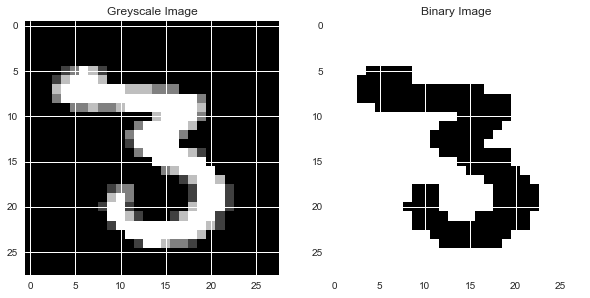

In [98]:
# Plot visualiztion of the different representations

plt.figure(figsize=(10, 6))

plt.figure(1)

plt.subplot(121)
image_greyscale = X_greyscale.iloc[13].as_matrix().reshape((28,28))
plt.imshow(image_greyscale, cmap='gray')
plt.title('Greyscale Image')

plt.subplot(122)
image_binary = X_binary.iloc[13].as_matrix().reshape((28,28))
plt.imshow(image_binary, cmap='binary')
plt.title('Binary Image')

## Baseline Models
Train and validate baseline models suing subset of training data 

In [108]:
# Use some basic models

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

# Use some ensemble methods, for this useit's okay if our model is a black box

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

baseline_models = [SVC, GaussianNB, QuadraticDiscriminantAnalysis, DecisionTreeClassifier, 
                   RandomForestClassifier, AdaBoostClassifier]
baseline_models_str = ['SVC', 'GaussianNB', 'QDA', 'Decision Tree', 
                   'Random Forest', 'Ada Boost']
baseline_scores_greyscale = []
baseline_scores_binary = []

for m in baseline_models:
    baseline_scores_greyscale.append(np.mean(cross_val_score(m(), X_gs_train[:5000], y_gs_train[:5000])))
    
for m in baseline_models:
    baseline_scores_binary.append(np.mean(cross_val_score(m(), X_binary_train[:5000], y_binary_train[:5000])))

In [119]:
baseline_df = pd.DataFrame()
baseline_df['model'] = pd.Series(baseline_models_str*2)
baseline_df['score'] = pd.Series(baseline_scores_greyscale + baseline_scores_binary)
baseline_df['kind'] = pd.Series(['Greyscale']*len(baseline_models) + ['Binary']*len(baseline_models))

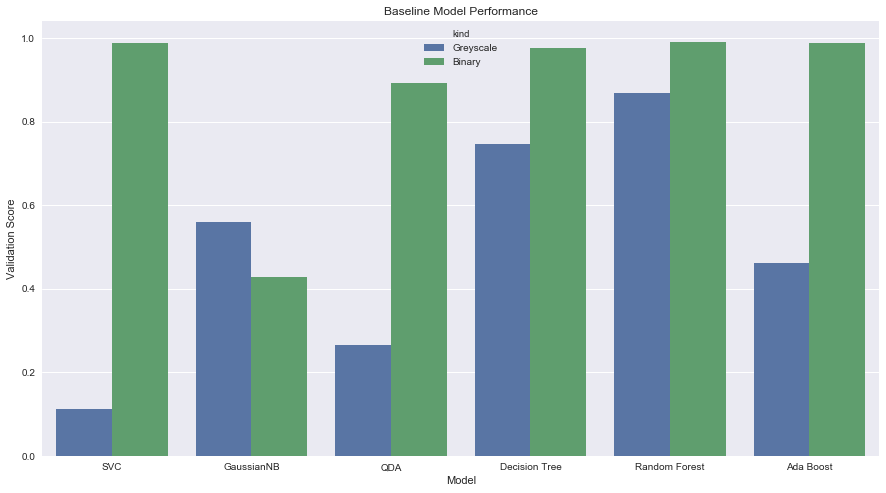

In [122]:
plt.figure(figsize=(15, 8))

ax = sns.barplot(x='model', y='score', hue='kind', data = baseline_df)
ax.set(title='Baseline Model Performance', xlabel='Model', ylabel="Validation Score")

The more simple classification models fare pretty terribly, but decision tree-based models seem to be working well. Lets try engineering our data a bit more to see if we can get better results.

In [126]:
random_forrest = RandomForestClassifier()
random_forrest.fit(X_binary_train, y_binary_train)
predict = random_forrest.predict(X_binary_test)
accuracy_score(y_binary_test, predict)

0.99609523809523814